In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams #customizing plot display options
import numpy as np
import seaborn as sns
import os
plt.style.use('fivethirtyeight')

from sklearn.ensemble import RandomForestRegressor # Random Forest Algorithm
from sklearn.model_selection import train_test_split # Split the dataset into trainning and testing subsets
from sklearn.model_selection import GridSearchCV # perform an exhautive search over specified parameter values
from sklearn.feature_selection import RFECV #selects the optimal subset of features
from sklearn.feature_selection import SelectFromModel, SelectKBest #For feature selection based on model importance or statistical tests
from sklearn.preprocessing import StandardScaler   #For standardizing fearures by removing the mean and scaling to unit variance
from sklearn import metrics #provides various metrics for evaluating machine learning models.

%matplotlib inline


In [3]:
# Loading the dataset
stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSFT_historical_data_yfinance.csv',index_col=0)
df_Stock = stock
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'])
df_Stock = df_Stock.reset_index()
df_Stock.set_index('Date',inplace=True)
df_Stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2013-12-13,31.509763,31.535026,30.836118,30.895061,40066100
2013-12-16,30.928732,31.156088,30.768743,31.063461,31734200
2013-12-17,31.105562,31.248713,30.591910,30.751900,45687700
2013-12-18,30.617180,30.819271,29.918271,30.802433,63192100
2013-12-19,30.743483,30.777166,30.381401,30.524549,34160100


In [4]:
# Displaying the shape of the dataset (number of rows, number of columns)
df_Stock.shape

(2517, 5)

# **Microsoft TIME SERIES CHART**

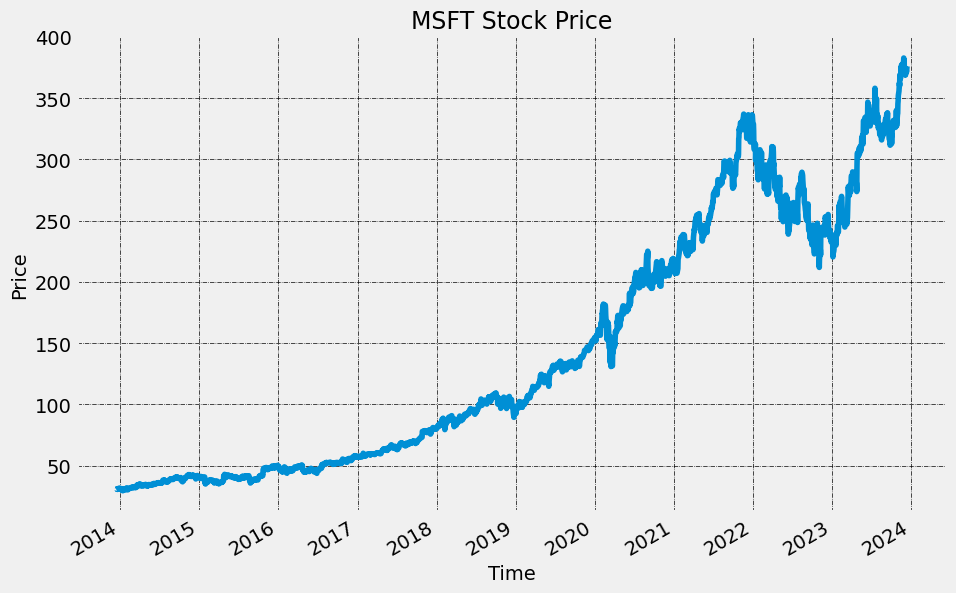

In [5]:
# Plotting a time series chart for the 'Close' prices
df_Stock['Close'].plot(figsize=(10,7))
plt.title('MSFT Stock Price',fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time',fontsize=14)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.show()

# **SET OF TEST TRAIN**

In [6]:
# Creating training, validation, and test sets
# 88% for training, 10% for validation, 2% for testing
def create_train_test_test(df_Stock):
    features = df_Stock.drop(['Close'],axis=1)
    target = df_Stock['Close']

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    #Splitting features and target into train, validation and test examples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #Print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_test(df_Stock)


Historical Stock Data length is -  2517
Training Set length -  2214
Validation Set length -  251
Test Set length -  50
(2214, 4) (251, 4) (52, 4)
(2214,) (251,) (52,)


# **LINEAR REGRESSION PREDICTION**

In [7]:
# Creating a Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fitting it on the training data
lr.fit(X_train, Y_train)

LinearRegression()

In [8]:
# Displaying coefficients and intercept of the Linear Regression model
print('LR Coefficients: \n',lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-6.60742181e-01  8.38309290e-01  8.22993440e-01 -2.59751420e-09]
LR Intercept: 
 0.07915280515682355


# **ANALYSE**

In [9]:
# Evaluating the performance (R-squared) of the Linear Regression model on the training data
print('Performance (R2):',lr.score(X_train, Y_train))

Performance (R2): 0.9998717525309986


In [10]:
# Function to compute mean absolute percentage error (MAPE)
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

# TEST DATASET PREDICTION

In [ ]:
# Making predictions on the training, validation, and test sets
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
# Evaluating the performance metrics on training, validation, and test sets
"""
 A comprehensive assessment of the linear regression model’s performance on the training, validation,
 and test sets. Metrics provide insight into the model’s accuracy, fit, and predictive capability,
 as well as how well it performs on different datasets.
"""

print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.42
Training Mean Squared Error: 1.02
Training RMSE:  1.01
Training MAE:  0.56
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.44
Validation Mean Squared Error: 1.02
Validation RMSE:  1.57
Validation MAE:  1.21
 
Test R-squared:  0.99
Test MAPE: 0.33
Test Mean Squared Error: 2.41
Test RMSE:  1.55
Test MAE:  1.18


In [ ]:
# Creating a DataFrame to compare actual and predicted values on the validation set
df_pred = pd.DataFrame(Y_test.values, columns=['Actual'], index=Y_test.index)
df_pred['Predicted'] = Y_test_pred
df_pred = df_pred.reset_index()
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')
df_pred

,Date,Actual,Predicted
0,2023-10-11,331.746674,330.392462
1,2023-10-12,330.489227,331.150412
2,2023-10-13,327.066193,328.172994
3,2023-10-16,331.966248,334.474052
4,2023-10-17,331.387390,330.580959
5,2023-10-18,329.441345,331.164959
6,2023-10-19,330.648895,334.613133
7,2023-10-20,326.008331,326.251317
8,2023-10-23,328.652954,330.194664
9,2023-10-24,329.860504,328.215634


# **PREDICTED VS ACTUAL PRICES ON TIME SERIES PLOT**

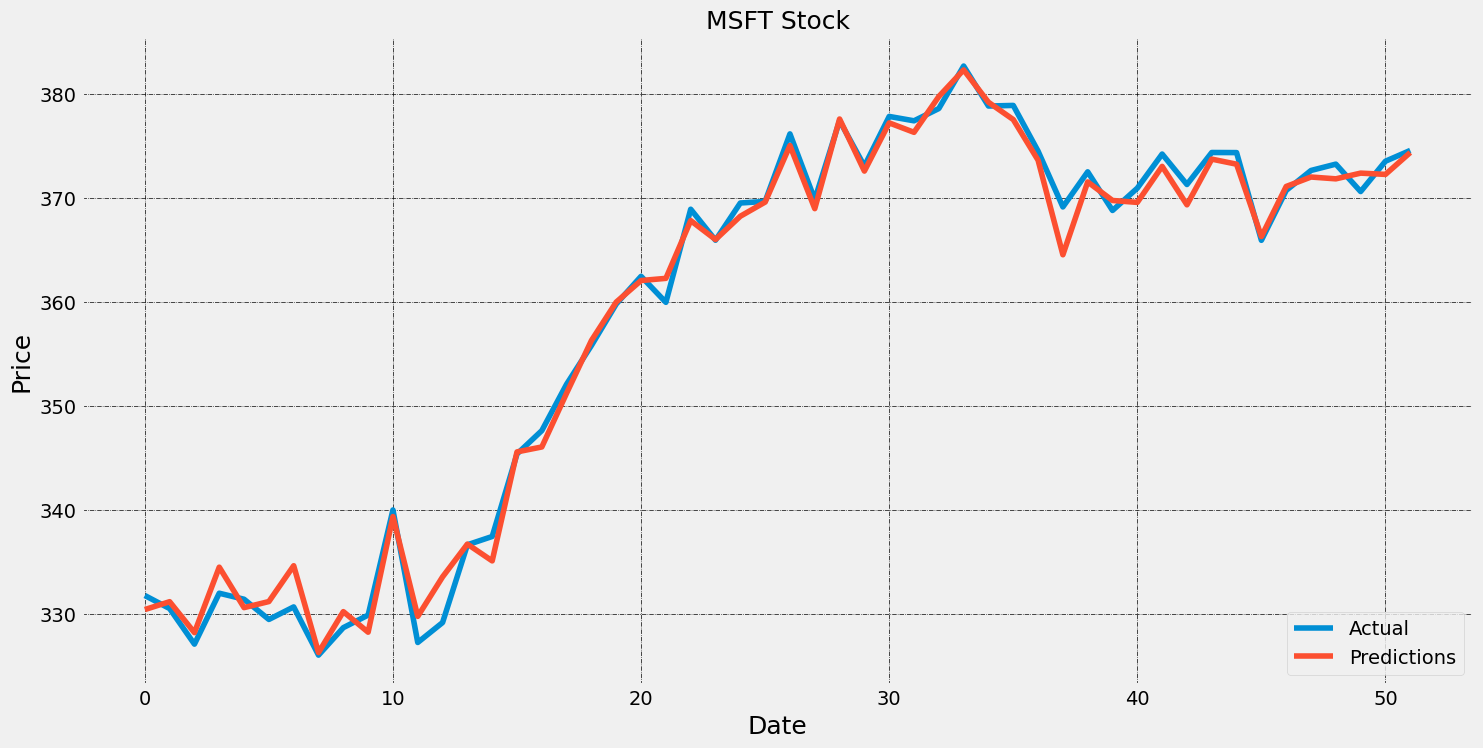

In [ ]:
# Plotting actual vs. predicted prices on a time series plot
plt.figure(figsize = (16,8))
plt.title('MSFT Stock',fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.grid(which='major',color='k', linestyle='-.',linewidth=0.5)
plt.plot(df_pred[['Actual', 'Predicted']])
plt.legend(['Actual', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
print('**Initializing Stock Price Analysis Program**')
print('------------------------------------------')

while True:
    name = input("Enter the business code (e.g., AAPL, GOOG, TSLA): ")
    if name.isalpha():  # Ensure code consists of letters only
        break
    print("Invalid business code. Please enter letters only.")
print('\n')
while True:
    try:
        opun = float(input("Enter today's open price: "))
        high = float(input("Enter today's high price: "))
        low = float(input("Enter today's low price: "))
        volume = float(input("Enter today's trading volume: "))
        break
    except ValueError:
        print("Invalid input. Please enter numbers only.")

if high < low:
    print("Error: High price cannot be lower than low price. Please try again.")

data = pd.DataFrame()
data['Open'] = [opun]
data['High'] = [high]
data['Low'] = [low]
data['Volume'] = [volume]

data
final = lr.predict(data)
print('\n')
print('Predicted close price :',final[0],' ,Good luck :)')

**Initializing Stock Price Analysis Program**
------------------------------------------
Enter the business code (e.g., AAPL, GOOG, TSLA): AAPL


Enter today's open price: 32
Enter today's high price: 33
Enter today's low price: 31
Enter today's trading volume: 17612800


Predicted close price : 32.06636339383007  ,Good luck :)
